# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

.خوش آمدید PCA | T-SNE به پروژه
-----------------------------
## **هدف**
-----------------------------
هدف از این مسئله این است که
**داده‌ها را کاوش کنید، تعداد ویژگی‌ها را با استفاده از تکنیک‌های کاهش ابعاد مانند تحلیل مولقه ی های اصلی و ... کاهش دهید، و بینش‌های معنادار استخراج کنید.**.

-----------------------------
## **مجموعه داده ها** 
-----------------------------
:هشت متغیر در داده ها وجود دارد

- mpg: مایل به گالن
- cyl: تعداد سیلندر
- disp: اندازه موتور
- hp: اسب بخار
- wt: وزن وسیله نقلیه به پوند
- acc: زمان رسیدن به 100 کیلومتر بر حسب ثانیه
- yr: سال ساخت
- car name: اسم مدل ماشین

## **فراخوانی کتابخانه های مورد نیاز**

In [1]:
import pandas as pd #کتابخانه مورد نیاز برای دیتا فریم ها

import numpy as np #کتابخانه مورد نیاز برای محاسبات عددی

import matplotlib.pyplot as plt #کتابخانه مورد نیاز برای نمایش داده

import seaborn as sns #کتابخانه پیشرفته تر برای نمایش داده


from sklearn.preprocessing import StandardScaler #کتابخانه ی مورد نیاز برای اسکیل استاندارد دیتا بین دو عدد مورد نیاز


from sklearn.decomposition import PCA # کتابخانه مورد نیاز برای کاهش بعد

from sklearn.manifold import TSNE #کتابخانه مورد نیاز برای کاهش بعد

### **بارگیری داده ها**

In [2]:
#دیتای مورد نظر را فراخوانی میکنیم
data = pd.read_csv("auto-mpg.csv")

In [3]:
# پنج سطر اول دیتا را نگاه میکنیم که به طور کلی دید کلی درباره ی ستون ها و تایپ دیتا داشته باشیم
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **اطلاعات دیتای مورد نظر را بررسی میکنیم**

In [4]:
# بررسی دیتا های از لحاظ تایپ داده ها، وجود دیتای ناقص و اسم ستون ها
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**مشاهدات:**

- تعداد ستون ها و سطر ها قابل مشاهده است 398 * 8 
- **همه ی دیتا ها غیر از اسب بخار و مدل ماشین عددی هستند.**
- اسب بخار باید یک نوع داده عددی باشد. در ادامه این را بررسی خواهیم کرد.

## **پیش پردازش داده ها و تجزیه و تحلیل داده های اکتشافی**

### **بررسی مقادیر منحصر به فرد در ستون "نام خودرو".**

In [5]:
data["car name"].nunique()

305

- ستون "نام خودرو" از نوع داده شی است که حاوی تعداد زیادی ورودی منحصر به فرد است و ارزشی به تجزیه و تحلیل ما اضافه نمی کند. ما می توانیم این ستون را حذف  کنیم.

In [6]:
# ایجاد کپی از داده ها به گونه ای که داده های اصلی را از دست ندهیم
data1 = data.copy()

# ستون اسم ماشین را حذف میکنیم
data = data.drop(['car name'], axis = 1)

### **بررسی مقادیر در ستون اسب بخار**

In [7]:
# بررسی اینکه آیا مقادیری غیر از ارقام در ستون "اسب بخار" وجود دارد یا خیر

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # اگر در این ستون در حروف عدد وجود داشت درست و غلط بازمیگرداند

data[hpIsDigit['horsepower'] == False]   # فقط ردیف هایی را در نظر بگیرید که اسب بخار یک رقم نیست

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**نتایج:**
- در نتایج شش سطر هستند که اسب بخار آنها ناقص است این هارا داده های ناقص مینامیم
- ما میتوانیم داده های ناقص را جایگذاری کنیم و تایپ ستون اسب بخار را تغییر دهیم.
- در ابتدا ما داده های ناقص را جایگذاری میکنیم

In [8]:
# nan جایگذاری ؟ با 
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# جایگذاری میانه اسب بخار در داده های ناقص
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # float تغییر تایپ ستون اسب خار به 

### **خلاصه آماری**

### **سوال 1:** 
- **بررسی آماری داده ها از فانکش توضیحات استفاده کنید 1نمره**
- **مشاهدات خود را یادداشت کنید 1نمره**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


**مشاهدات:**همه ی دیتای ما عددی شده اند و داده گم شده نداریم

### **بیایید توزیع و نقاط پرت را برای هر ستون در داده ها بررسی کنیم**

### **سوال 2:**
- **(از  .hist() استفاده کنید)برای بررسی توزیع همه متغیرها هیستوگرام ایجاد کنید  (2 نمره)**
- **نمودارهای جعبه ای ایجاد کنید تا نقاط پرت را برای همه متغیرها تجسم کنید (use sns.boxplot()) (2 نمره)**
- **نتایج خود را یادداشت کنید (2 نمره)**

mpg
Skew : 0.46


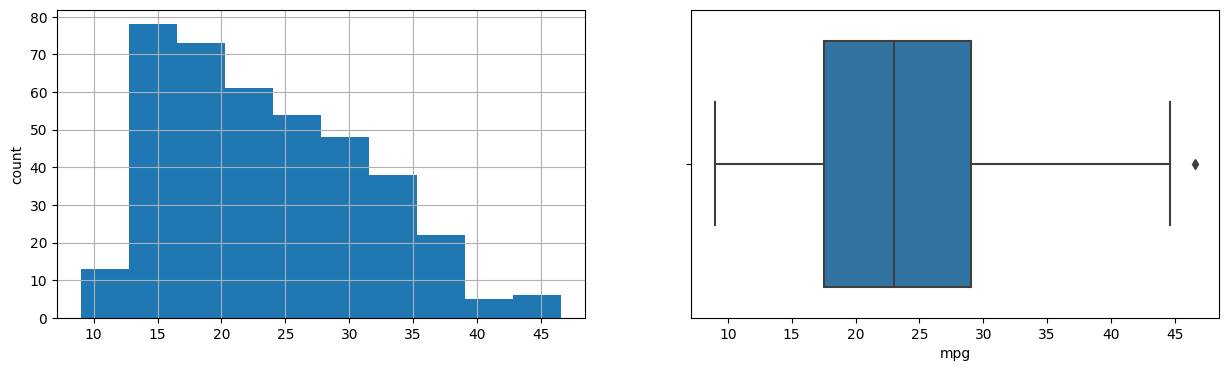

cylinders
Skew : 0.53


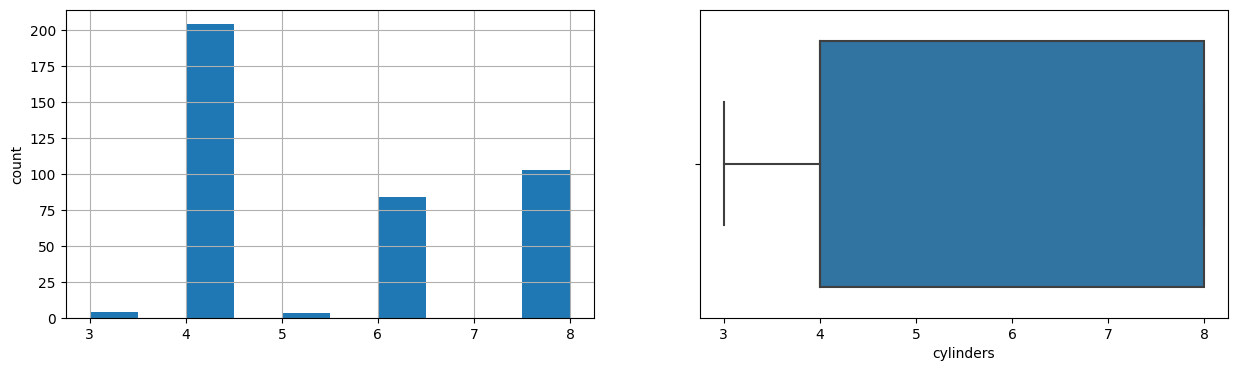

displacement
Skew : 0.72


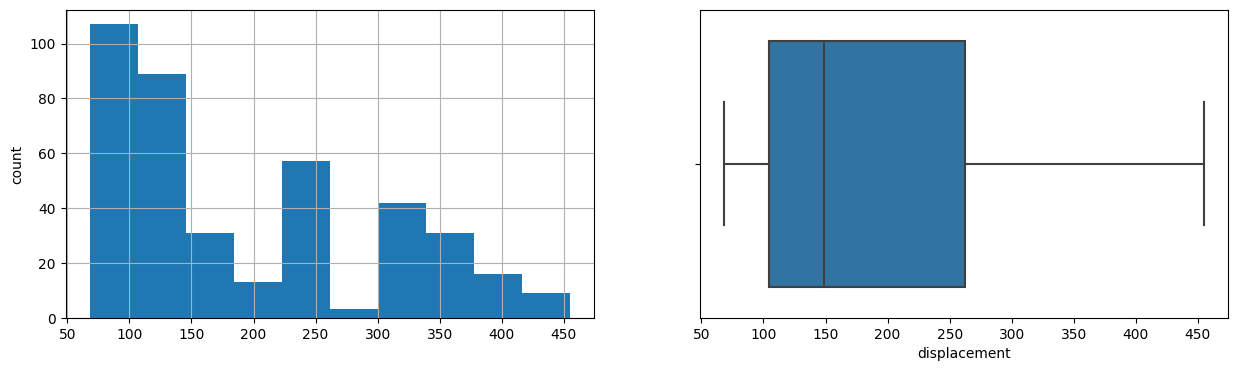

horsepower
Skew : 1.11


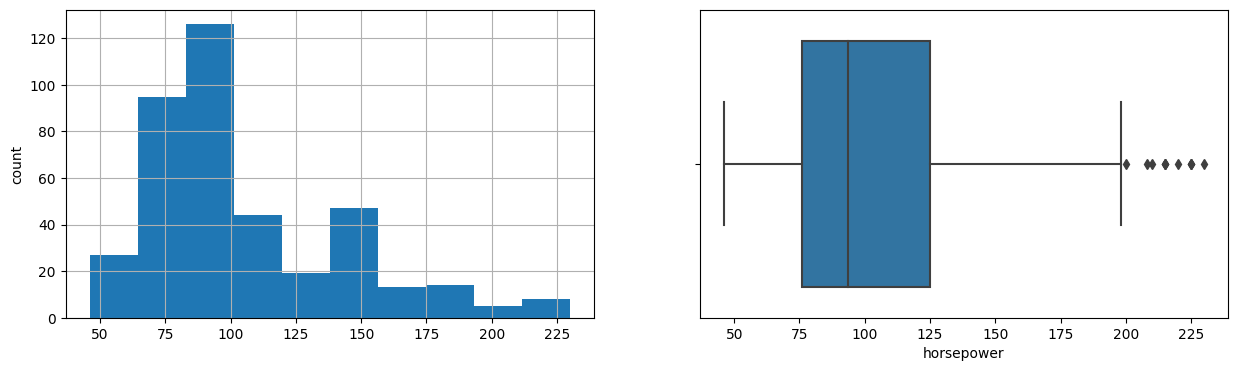

weight
Skew : 0.53


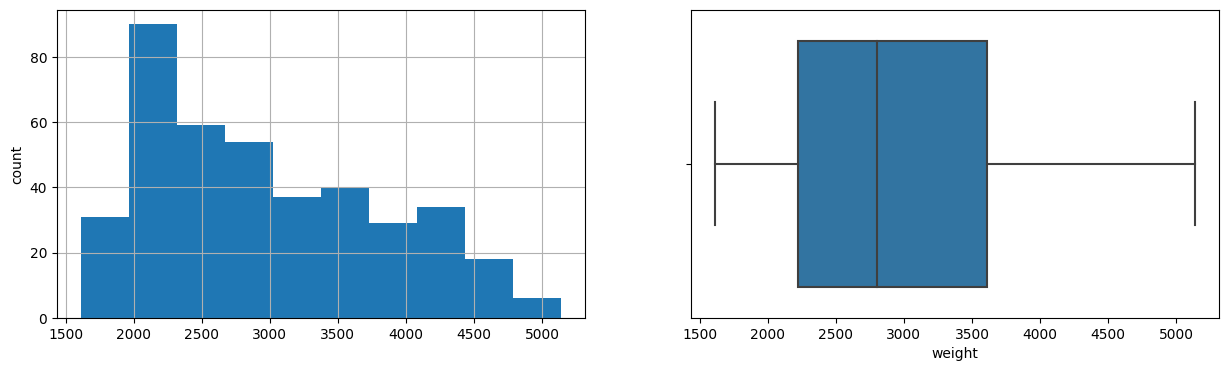

acceleration
Skew : 0.28


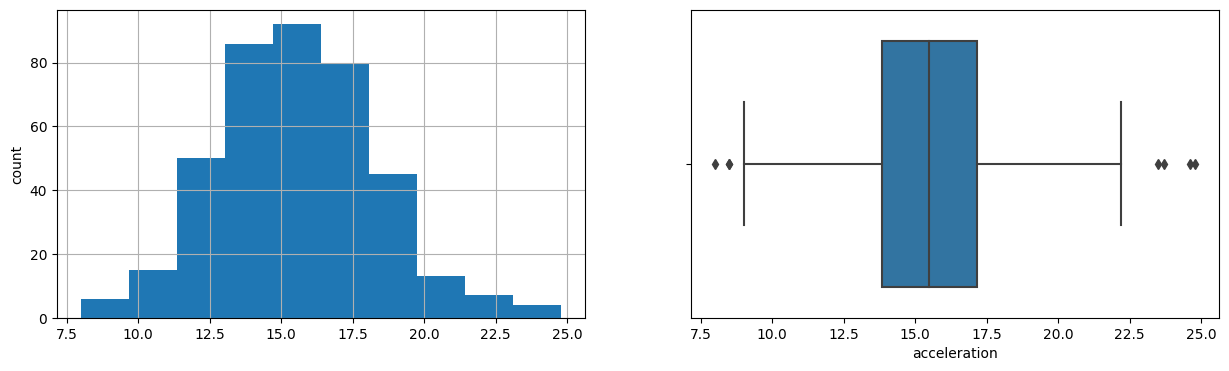

model year
Skew : 0.01


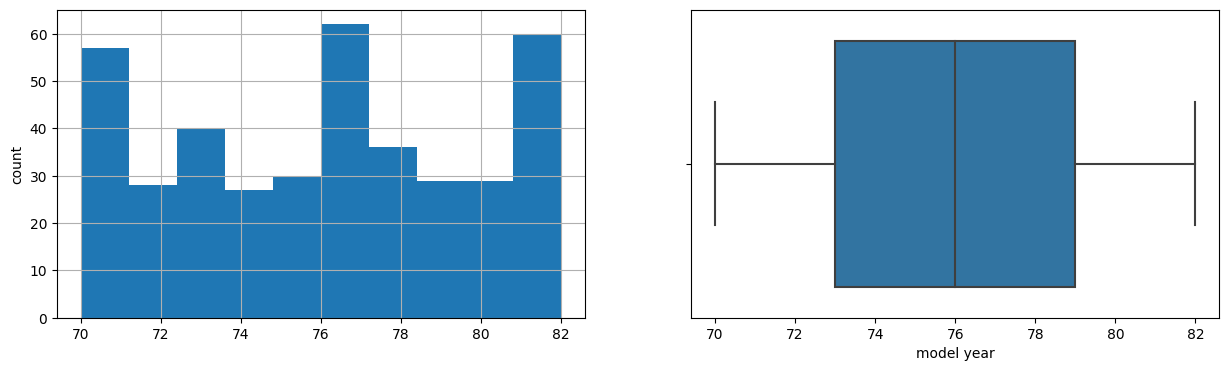

In [11]:
# قبل از اجرای این سلول، کد زیر را با پر کردن جاهای خالی تکمیل کنید تا از هر گونه خطا جلوگیری شود

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist()
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = col, data = data)
    
    plt.show()

**مشاهدات:دو نمودار ارائه شده اطلاعاتی درباره ی میزان پراکندگی داده ها و نحوه توزیع آنها می دهند. میانگین هم در تصاویر نمایش داده شده دیده می شود**

### **همبستگی داده هارا بررسی کنید**

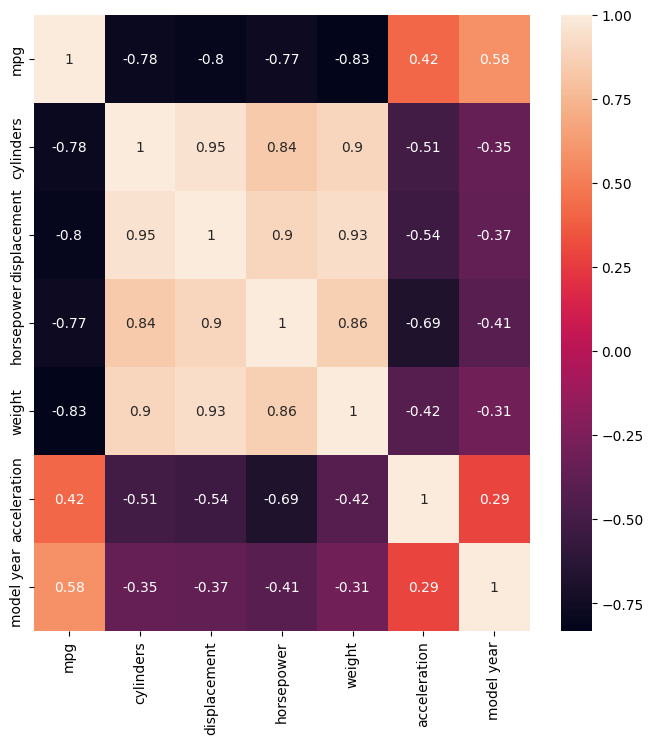

In [12]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True)

plt.show()

**مشاهدات:**
- متغیر مایل به گالن همبستگی منفی قوی با سیلندرها، جابجایی، اسب بخار و وزن دارد.
- اسب بخار و شتاب همبستگی منفی دارند.
- وزن متغیر همبستگی مثبت قوی با اسب بخار، جابجایی و سیلندرها دارد.
- سال مدل با مایل به گالن همبستگی مثبت دارد.

### **مقیاس بندی داده ها**

In [13]:
# مقیاس بندی داده 
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [14]:
#بررسی 5 سطر اول دیتا
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## ** تجزیه و تحلیل مؤلفه های اصلی**

### **سوال 3:**

- **الگوریتم  تجزیه و تحلیل مؤلفه های اصلی را با تعداد اجزاء برابر با تعداد کل ستون های داده اعمال کنید (2 نمره)**
- **مشاهدات خود را در مورد واریانس توضیح داده شده توسط مؤلفه های اصلی بنویسید(2 نمره)**

In [15]:
#تعریف تعداد اجزای اصلی برای تولید 
n = data_scaled.shape[1]

# یافتن اجزای اصلی برای داده ها
pca = PCA(random_state=1) # الگوریتم تجزیه و تحلیل مؤلفه های اصلی را با random_state = 1 اعمال کنید

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))    # تابع تجزیه و تحلیل مؤلفه های اصلی را بر روی داده های مقیاس بندی شده جاسازی و تبدیل کنید

# درصد واریانس توضیح داده شده توسط هر جزء اصلی
exp_var = pca.explained_variance_ratio_
print(exp_var)

[0.71476787 0.1236554  0.10414042 0.02671968 0.01778617 0.00790889
 0.00502158]


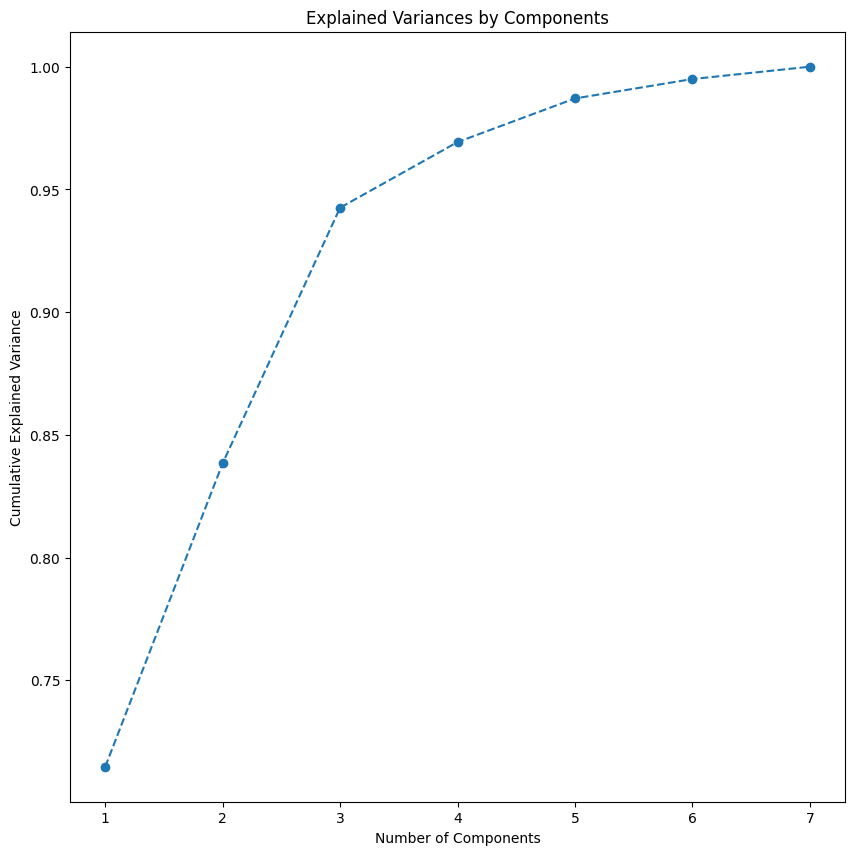

In [16]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [17]:
# یافتن کمترین تعداد مؤلفه هایی که می توانند بیش از 90 درصد واریانس را توضیح دهند
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**مشاهدات:سه تا از دیتای مورد نظر ما واریانس کمتر از 90 درصد دارند.**

In [18]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


### **سوال 4: ضرایب سه جزء اصلی اول را از داده های زیر تفسیر کنید (4 نمره)**

In [21]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'
    
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**مشاهدات:__________________**

#### ما همچنین می توانیم داده ها را در 2 بعد با استفاده از دو جزء اصلی اول تجسم کنیم

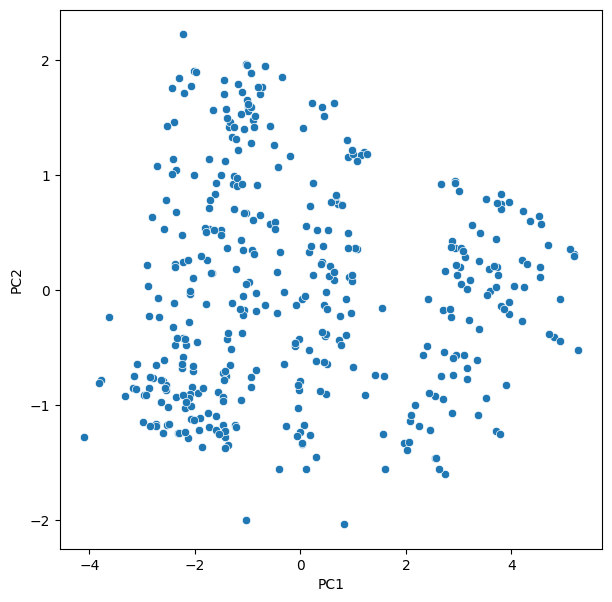

In [22]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**بیایید سعی کنیم رنگ به طرح پراکندگی اضافه کنیم**

### **سوال 5:** 

- **یک نمودار پراکندگی برای دو جزء اصلی اول با رنگ = 'سیلندر' ایجاد کنید (2 نمره)** 
- **مشاهدات خود را نمایش دهید (2 نمره)**
- **راهنمایی:** تاریخ 'data_pca1' و 'data' را در محور = 1 به هم بچسبانید

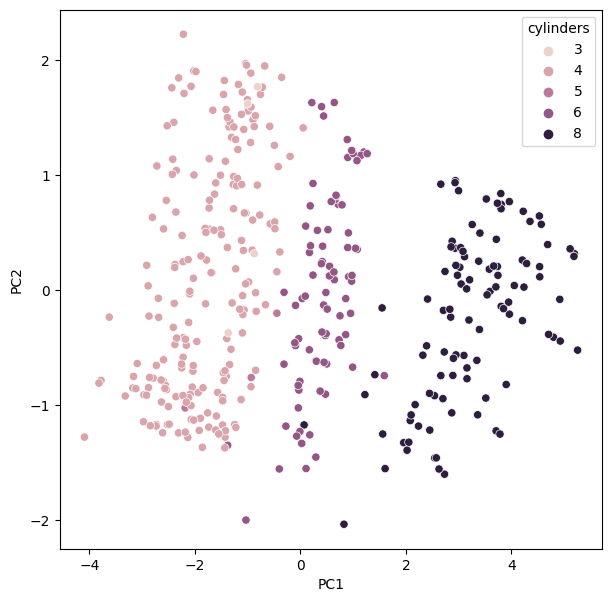

In [30]:
df_concat = pd.concat([data_pca1, data['cylinders']], axis=1)

plt.figure(figsize=(7, 7))

sns.scatterplot(data=df_concat, x=0, y=1, hue='cylinders')

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()


**مشاهدات:___________**

## t-SNE

### **سوال 6:** 
- **تعبیه t-SNE را با 2 مؤلفه برای DataFrame 'data_scaled' اعمال کنید (از حالت_تصادفی = 1 استفاده کنید) (3 نمره)**
- **نایج خود را یادداشت کنید (2 نمره)**   

In [32]:
tsne = TSNE(random_state=1)           # الگوریتم t-SNE را با حالت_تصادفی = 1 اعمال کنید

data_tsne = tsne.fit_transform(data_scaled)    # برازش و تبدیل تابع t-SNE بر روی داده های مقیاس شده

In [33]:
data_tsne.shape

(398, 2)

In [34]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [35]:
data_tsne.head()

,Component 1,Component 2
0,37.579971,2.138400
1,38.064915,0.073901
2,38.115463,1.203496
3,37.521984,1.321069
4,38.225060,1.684076


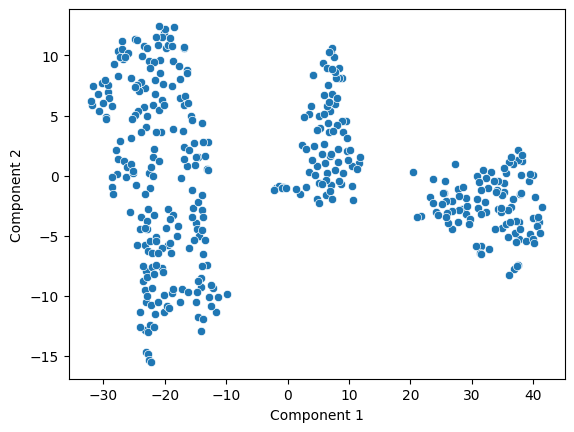

In [36]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

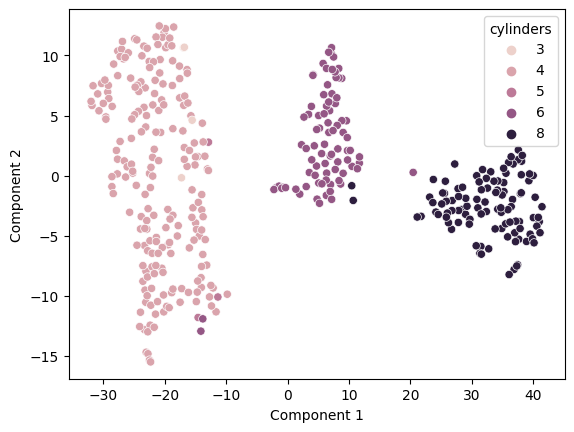

In [37]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

**Observations:______________**

In [38]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    
    second_component = x['Component 2']
    
    if (first_component > 0) and (second_component > -5): 
        return 'group_1'
    
    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'
    
    else: 
        return 'group_3'

In [39]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

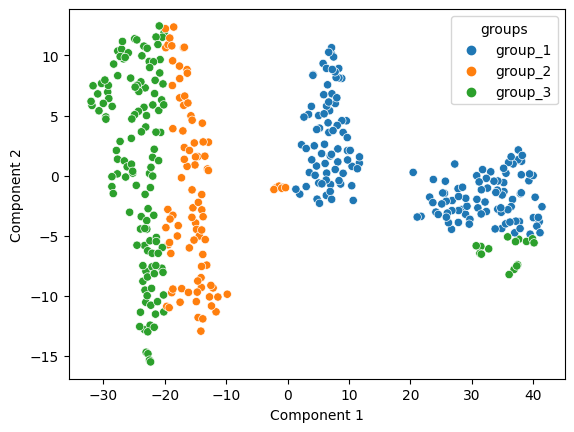

In [40]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [41]:
data['groups'] = data_tsne['groups'] 

### **سوال 7:** 
- **کد زیر را با پر کردن جاهای خالی کامل کنید (2 نمره)**
- **مشاهدات خود را روی گروه های مختلف بدون متغیرهای مختلف بنویسید (3 نمره)**

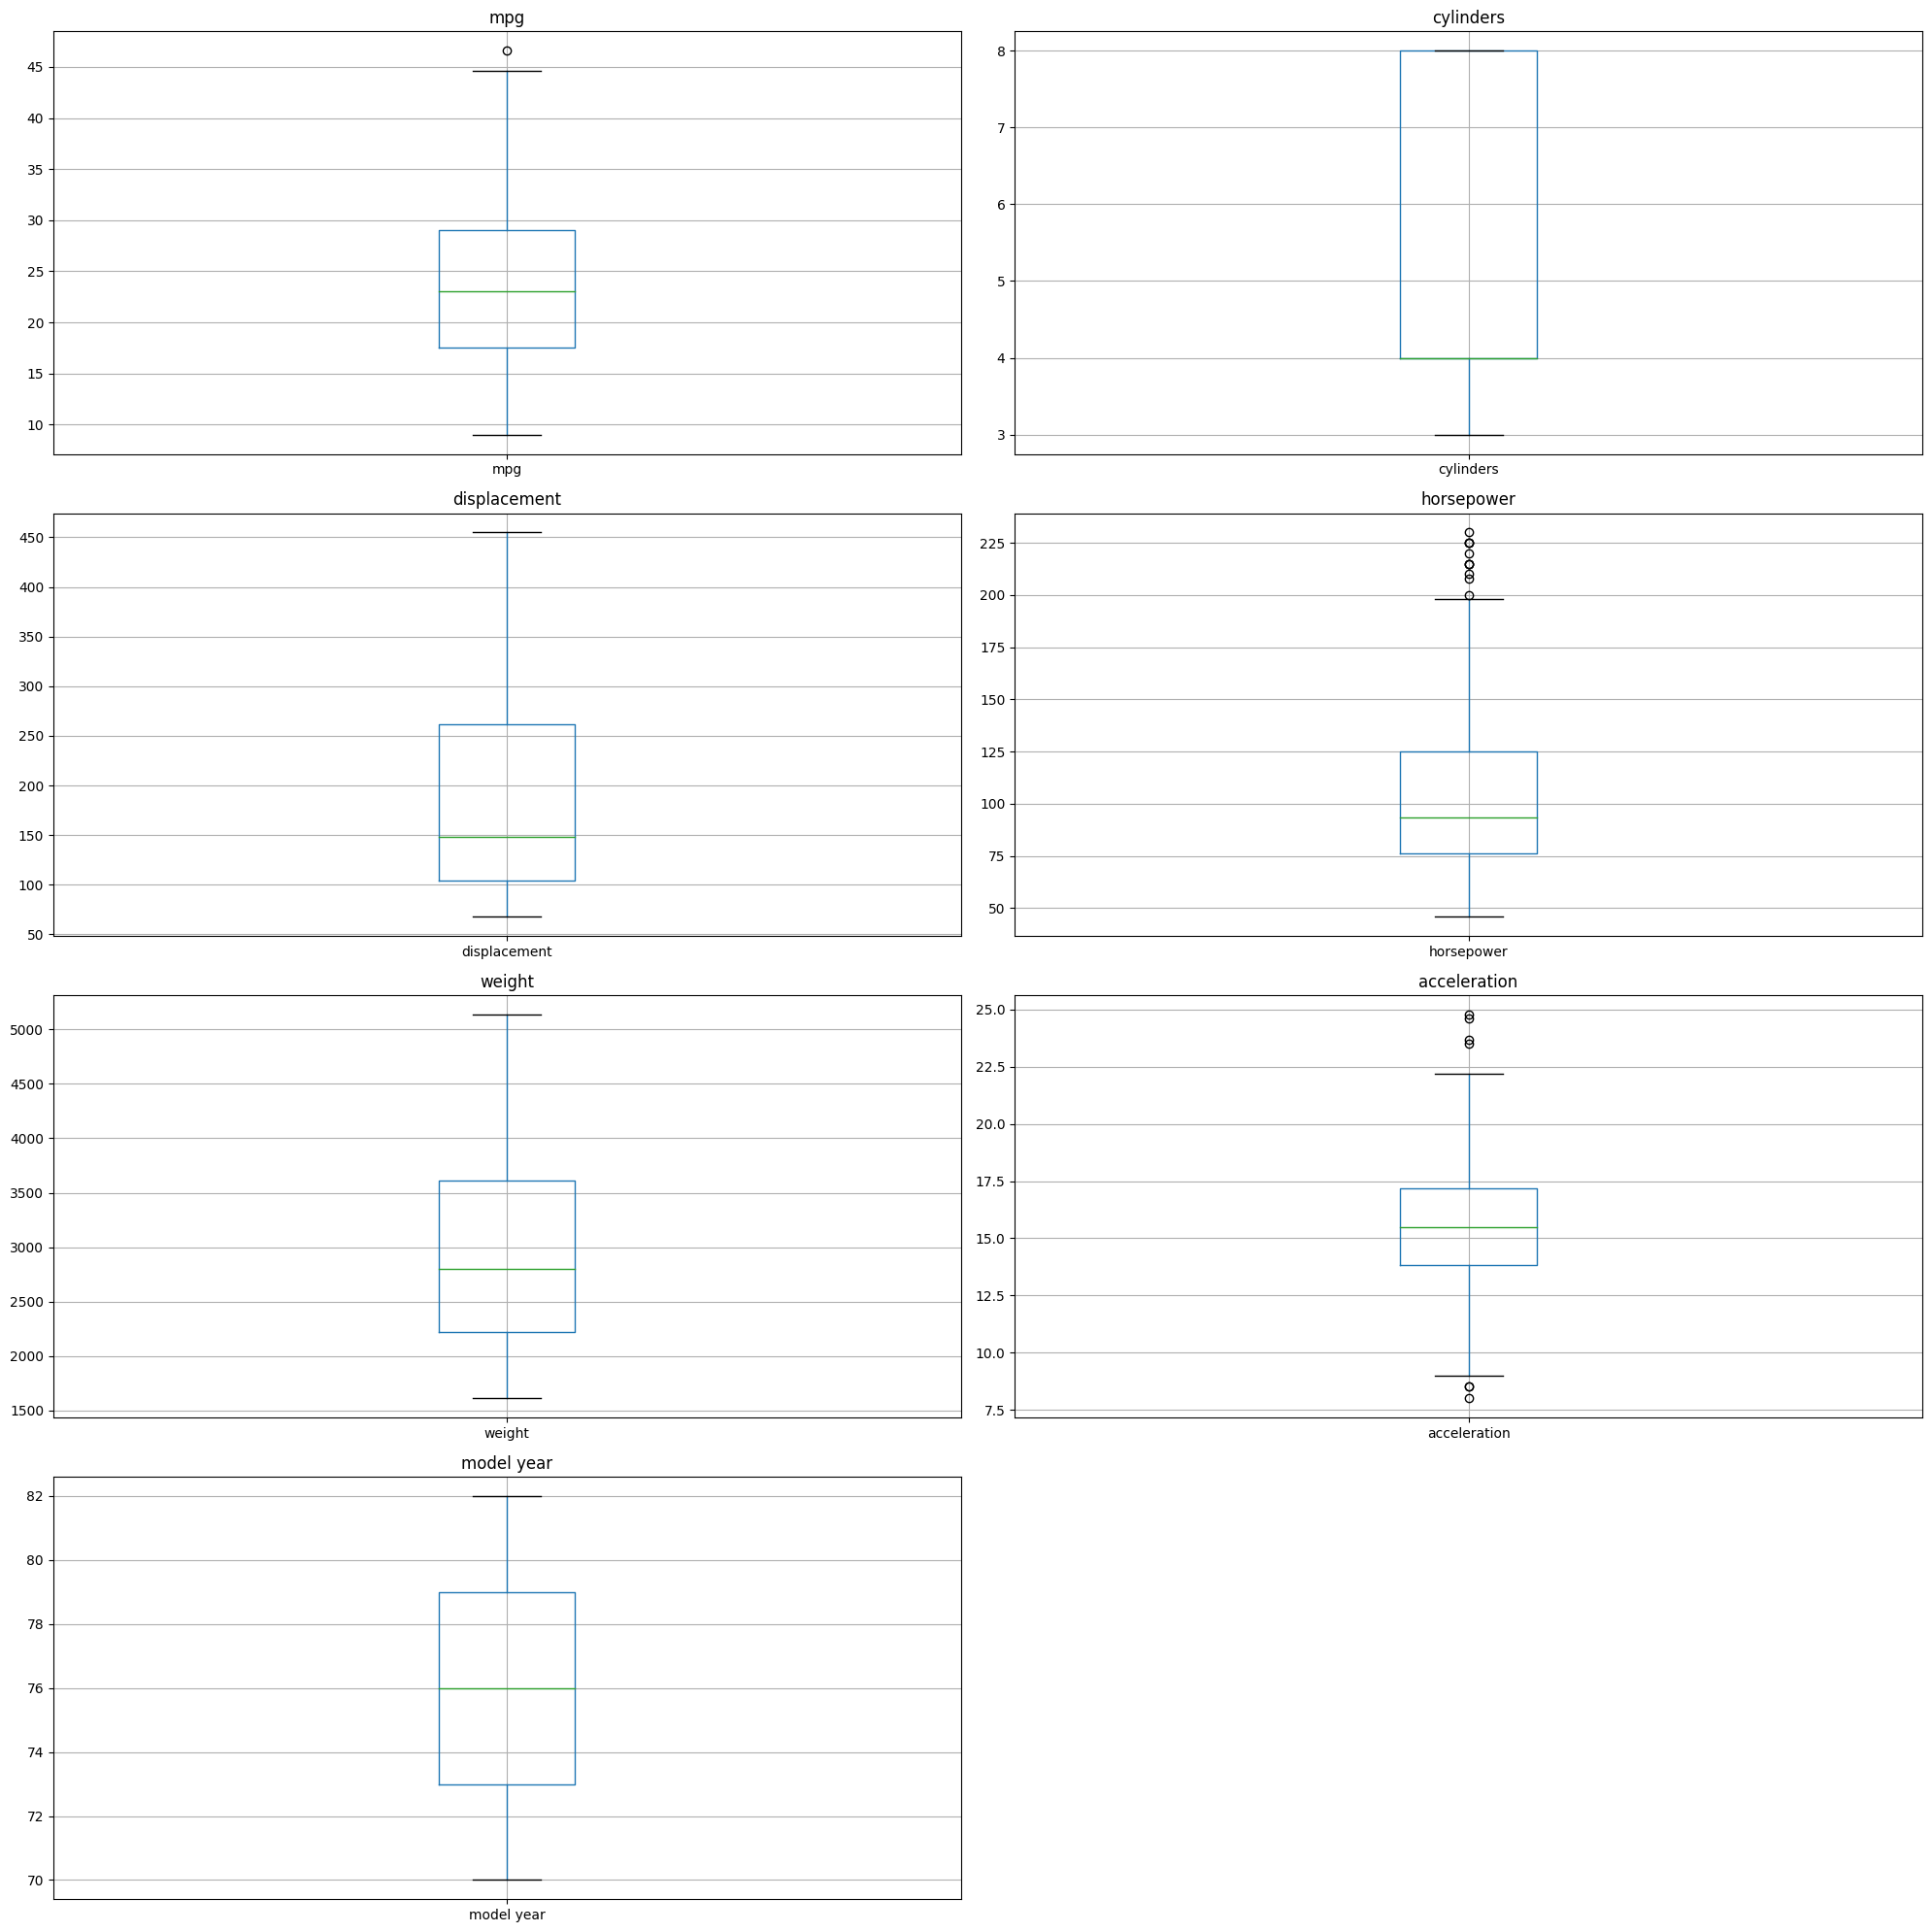

In [42]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col): 
    if i == 7:
        break
    
    plt.subplot(4, 2, i + 1)
    
    data.boxplot(column=variable)      # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:___________**